# Experiment 11 Open Ended Lab 

# Automobile Manufacture

## Problem Statement

The automobile manufacturer is seeking to identify the closest competitors to their newly developed vehicle prototypes before launching the new model. To achieve this, they need to group existing vehicles on the market based on similarities, determine which group is the most similar to the prototypes, and use this information to identify the primary competitors for their new model. 
The objective is to utilize clustering techniques to identify clusters of vehicles that possess unique characteristics. This analysis will provide an overview of the current market of vehicles and aid manufacturers in deciding on the development of new models based on the identified distinct clusters.


## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy
import pylab
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances

## Import Dataset

In [2]:
car=pd.read_csv("Data/cars_clus.csv")
car.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


## Data Preparation

In data Preparation, following steps are performed. Not specifically in this particular order 
1. Dealing With Null Values
2. Dealing With wrong values
3. Dealing with Duplicates
4. Data Normalization
5. Label Encorder
6. Converting into required Class

In [3]:
car.model=car.model.apply(lambda x:pd.NA if "9" in str(x) else x)

In [4]:
car.isna().sum()

manufact     2
model        2
sales        0
resale       0
type         0
price        0
engine_s     0
horsepow     0
wheelbas     0
width        0
length       0
curb_wgt     0
fuel_cap     0
mpg          0
lnsales      0
partition    0
dtype: int64

In [5]:
car_test=car.dropna(axis=0,inplace=True)

In [6]:
for column in car.columns:
    car[column]=car[column].apply(lambda x:pd.NA if str(x)=="$null$" else x)
car.isna().sum()

manufact      0
model         0
sales         0
resale       34
type          0
price         2
engine_s      1
horsepow      1
wheelbas      1
width         1
length        1
curb_wgt      2
fuel_cap      1
mpg           3
lnsales       0
partition     0
dtype: int64

In [7]:
car[car.isna().sum(axis=1)>2]

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
33,Chrysler,Town & Country,53.480,19.540,1.000,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,3.979,0.0


In [8]:
car.drop(car.index[33],axis=0,inplace=True)

## Removing Single Unique Column

As Partitions data has only 1 entity and it is not changing so it would not be contributing anything in the prediction model. Release this feature would be a perference as less computation may be require

In [9]:
car.drop(["partition"],axis=1,inplace=True)

## Filling the null values

In [10]:
car["price"] = pd.to_numeric(car["price"], errors="coerce")
car["price"].fillna(car["price"].mean(), inplace=True)

car["curb_wgt"] = pd.to_numeric(car["curb_wgt"], errors="coerce")
car["curb_wgt"].fillna(car["curb_wgt"].mean(), inplace=True)

car["mpg"] = pd.to_numeric(car["mpg"], errors="coerce")
car["mpg"].fillna(car["mpg"].mean(), inplace=True)

## Converting into Required Class Type

In [11]:
car["sales"]=car["sales"].astype("float16")
car["type"]=car["type"].astype("float16").astype("int16")
car["engine_s"]=car["engine_s"].astype("float16")
car["horsepow"]=car["horsepow"].astype("float16").astype("int16")
car["wheelbas"]=car["wheelbas"].astype("float16")
car["width"]=car["width"].astype("float16")
car["length"]=car["length"].astype("float16")
car["fuel_cap"]=car["fuel_cap"].astype("float16")
car["lnsales"]=car["lnsales"].astype("float16")
car["price"]=car["price"].astype("float16")
car["curb_wgt"]=car["curb_wgt"].astype("float16")
car["mpg"]=car["mpg"].astype("int16")
car["resale"] = pd.to_numeric(car["resale"], errors="coerce")

In [12]:
car.dtypes

manufact     object
model        object
sales       float16
resale      float64
type          int16
price       float16
engine_s    float16
horsepow      int16
wheelbas    float16
width       float16
length      float16
curb_wgt    float16
fuel_cap    float16
mpg           int16
lnsales     float16
dtype: object

## Predicting Values using Linear Regression

In [13]:
df=car.copy()

### Label Encoding

In [14]:
encoder=LabelEncoder()
df.model=encoder.fit_transform(df.model)
df.manufact=encoder.fit_transform(df.manufact)

### Normalization

In [15]:
scaler=StandardScaler()
df[["manufact","model","sales","price","engine_s","horsepow","wheelbas","width","length","curb_wgt","fuel_cap","mpg","lnsales"]]=scaler.fit_transform(df[["manufact","model","sales","price","engine_s","horsepow","wheelbas","width","length","curb_wgt","fuel_cap","mpg","lnsales"]])
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales
0,-1.721175,0.018859,-0.536252,16.360,0,-0.408665,-1.220855,-0.809898,-0.827477,-1.119705,-1.112550,-1.179290,-1.218783,0.975294,-0.359888
1,-1.721175,1.471021,-0.207467,19.875,0,0.072769,0.121176,0.684754,0.078434,-0.250241,0.408923,0.216618,-0.192932,0.272352,0.280220
2,-1.721175,-1.206402,-0.577321,18.225,0,-0.000209,0.121176,0.684754,-0.084793,-0.159672,0.343982,0.142169,-0.192932,0.506666,-0.497370
3,-1.721175,0.835700,-0.658316,29.725,0,1.020388,0.409624,0.420992,0.927215,0.057694,0.687241,0.743961,0.011436,-0.430590,-0.872861
4,-1.600529,-1.592133,-0.485458,22.255,0,-0.235480,-1.220855,-0.634057,-0.639766,-0.866111,-0.695073,-0.608519,-0.397301,0.740980,-0.217970


### Spliting data

In [16]:
y = df["resale"].dropna(axis=0)
X_test = df[df.isna().any(axis=1)].copy()
X_test.drop(["resale"],axis=1,inplace=True)
df.dropna(axis=0,inplace=True)
df.drop(["resale"],axis=1, inplace=True)

### Model Selection

In [17]:
model=LinearRegression()
model.fit(df,y)

LinearRegression()

### Model Prediction

In [18]:
resale_pred=model.predict(X_test)

In [19]:
nan_indices = car['resale'].isnull()
car.loc[nan_indices, 'resale'] = resale_pred

## Checking Duplicate Value

In [20]:
car.duplicated().sum()

0

## Feature Selection

C:\Users\muham\AppData\Local\Temp\ipykernel_23440\899194147.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = car.corr()


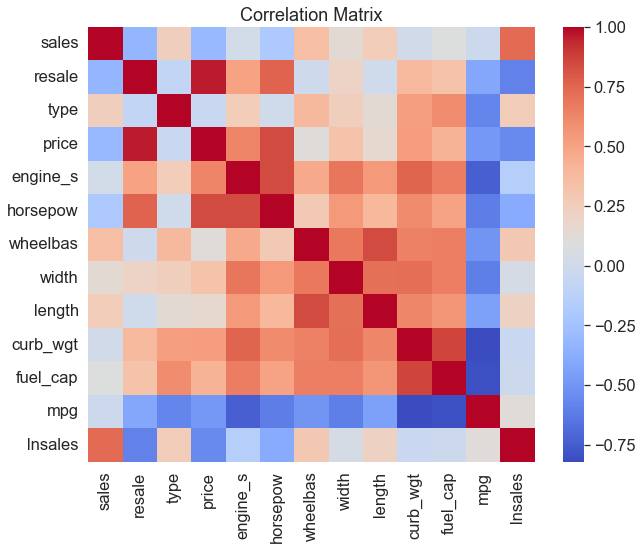

In [21]:
correlation_matrix = car.corr()
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.5)
plt.title('Correlation Matrix')
sns.heatmap(correlation_matrix,cmap='coolwarm');

Using the above table, we can see that price and rescale are highly corelated.

In [22]:
car.drop(['resale'],axis=1,inplace=True)

In [23]:
car=car.reset_index(drop=True)

## Data Modeling

In [24]:
featureset = car[['sales','price','engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]

### Normalization

In [25]:
featureset[['sales','price','engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]=scaler.fit_transform(featureset[['sales','price','engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']])
featureset.head()

C:\Users\muham\AppData\Local\Temp\ipykernel_23440\1567509421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  featureset[['sales','price','engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]=scaler.fit_transform(featureset[['sales','price','engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']])


,sales,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg
0,-0.536252,-0.408665,-1.220855,-0.809898,-0.827477,-1.119705,-1.112550,-1.179290,-1.218783,0.975294
1,-0.207467,0.072769,0.121176,0.684754,0.078434,-0.250241,0.408923,0.216618,-0.192932,0.272352
2,-0.577321,-0.000209,0.121176,0.684754,-0.084793,-0.159672,0.343982,0.142169,-0.192932,0.506666
3,-0.658316,1.020388,0.409624,0.420992,0.927216,0.057694,0.687241,0.743960,0.011436,-0.430590
4,-0.485458,-0.235480,-1.220855,-0.634057,-0.639766,-0.866111,-0.695073,-0.608519,-0.397301,0.740980


Here, we are calcuting distance using Euclidean formula

In [26]:
distance=euclidean_distances(featureset.values,featureset.values)
len(distance)

154

Finding the linkage

In [27]:
z=sch.linkage(distance,"complete")
len(z)

C:\Users\muham\AppData\Local\Temp\ipykernel_23440\3041572958.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  z=sch.linkage(distance,"complete")


153

### Dendrogram

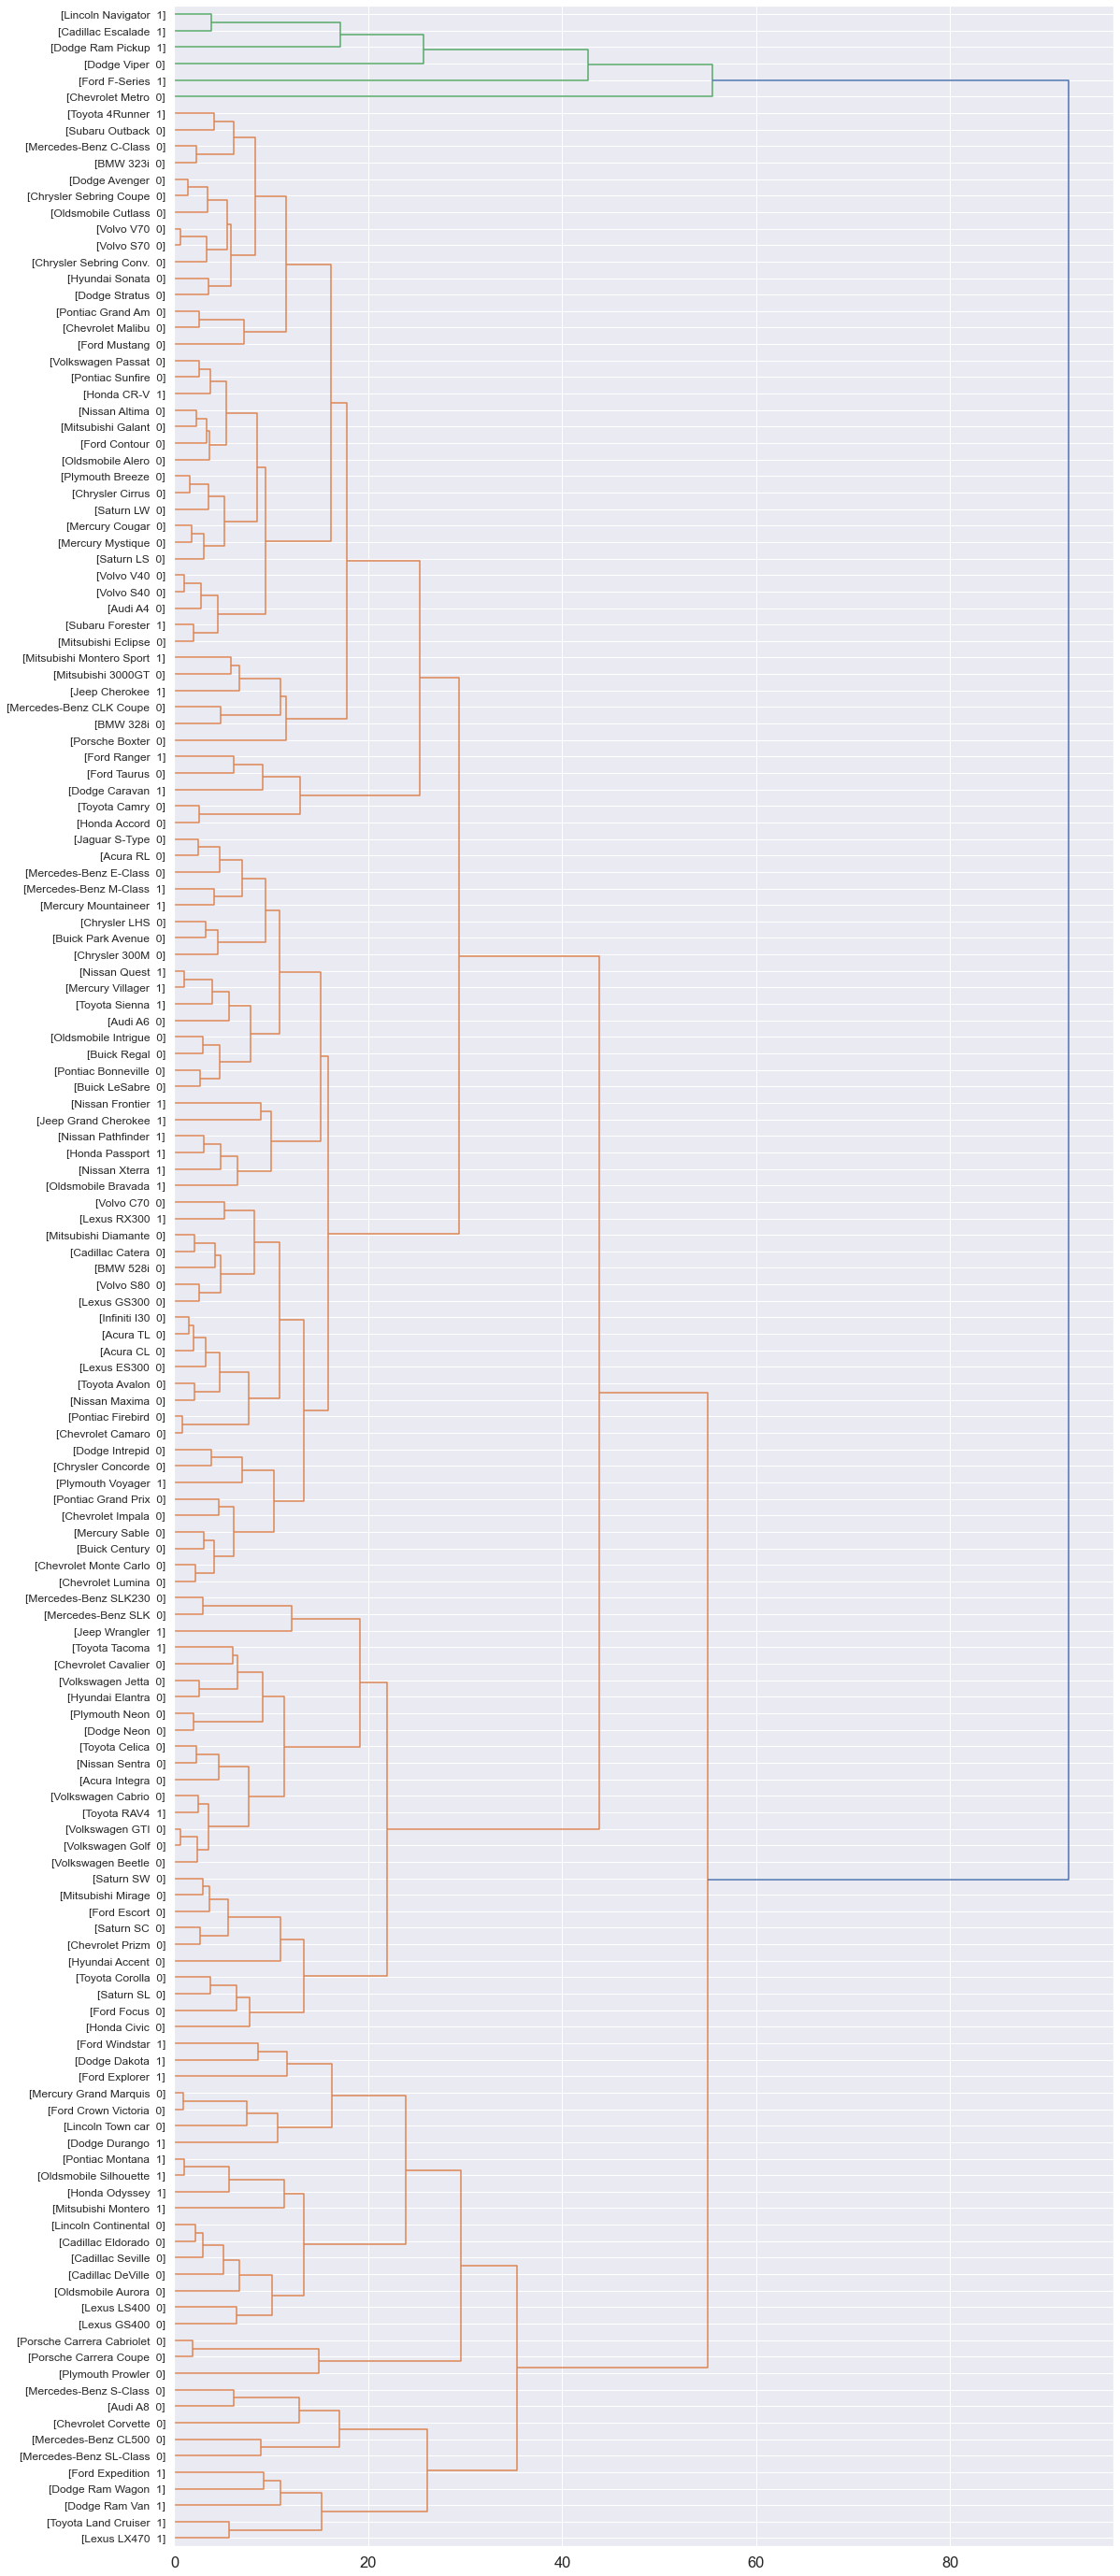

In [28]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return f"[{car['manufact'][id]} {car['model'][id]}  {car['type'][id]}]"   
dendro = sch.dendrogram(z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

### Modeling the Data

In [29]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(distance)
agglom.labels_

C:\Users\muham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:544: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([4, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 3, 4, 1, 1,
       1, 1, 0, 4, 5, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 3, 3, 0, 0, 0, 0,
       1, 4, 1, 1, 1, 4, 0, 0, 0, 0, 1, 2, 4, 1, 1, 1, 0, 4, 4, 1, 1, 1,
       4, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 3, 4, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 4, 4, 1, 0, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 4, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 4, 4, 4, 1, 1, 1,
       1, 4, 1, 1, 4, 4, 1, 4, 1, 0, 4, 4, 1, 4, 4, 4, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [30]:
car['cluster_'] = agglom.labels_
car.head()

,manufact,model,sales,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,cluster_
0,Acura,Integra,16.921875,0,21.500000,1.799805,140,101.1875,67.3125,172.375,2.638672,13.203125,28,2.828125,4
1,Acura,TL,39.375000,0,28.406250,3.199219,225,108.1250,70.3125,192.875,3.517578,17.203125,25,3.673828,1
2,Acura,CL,14.117188,0,27.359375,3.199219,225,106.8750,70.6250,192.000,3.470703,17.203125,26,2.646484,1
3,Acura,RL,8.585938,0,42.000000,3.500000,210,114.6250,71.3750,196.625,3.849609,18.000000,22,2.150391,1
4,Audi,A4,20.390625,0,23.984375,1.799805,150,102.6250,68.1875,178.000,2.998047,16.406250,27,3.015625,1


## Data Visualization

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

Text(0, 0.5, 'mpg')

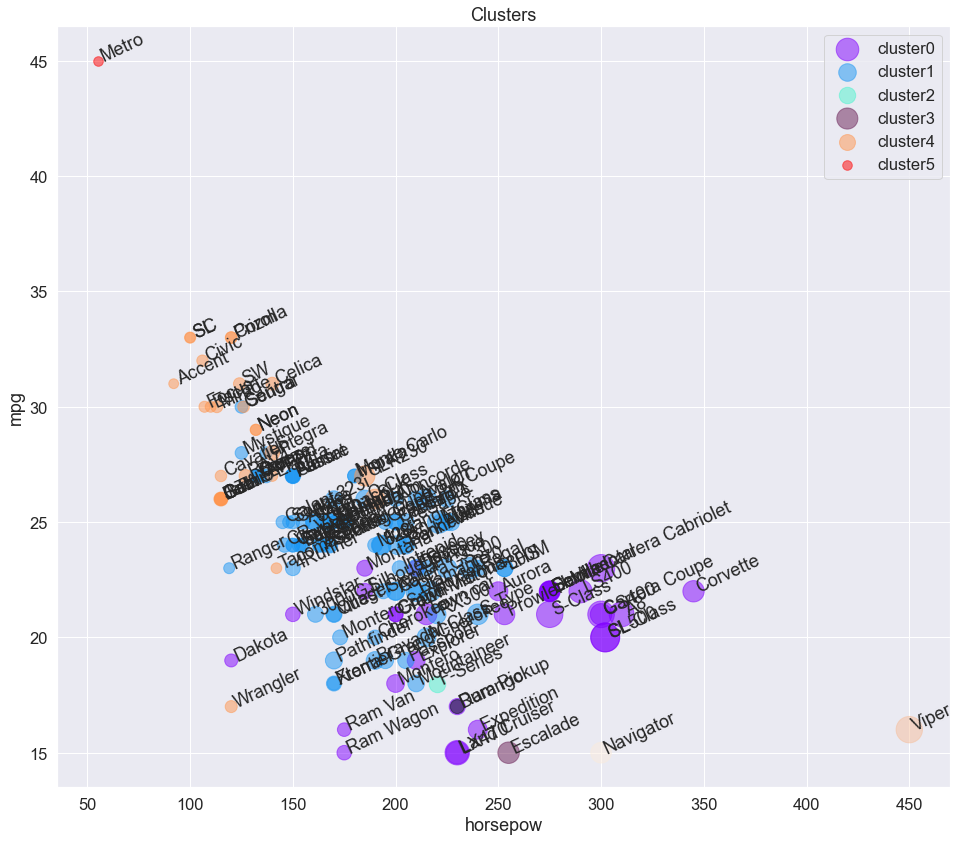

In [31]:
n_clusters = max(agglom.labels_)+1
colors = plt.cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = car[car.cluster_ == label]
    for i in subset.index:
            plt.text(subset.horsepow[i], subset.mpg[i],str(subset['model'][i]), rotation=25) 
    plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)

plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')